In [1219]:
import pandas as pd
import re
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')

df_dataset= pd.read_excel("mypertaminadata.xlsx")
df_dataset.head()

,text,Sentimen
0,"Caessar Titto,1,2022-07-15 23:29:56,""Semoga ap...",1
1,"dimas aulia rahman,1,2022-07-15 23:31:43,Aplik...",1
2,"Batterfly 12,1,2022-07-15 23:41:43,Ntah laah s...",0
3,"Keyaan Channel,1,2022-0 7-15 23:45:23,Selevel ...",0
4,"karya saputra,1,2022-07-16 00:00:53,""Maaf kasi...",0


In [1220]:
df_dataset['text'] = df_dataset['text'].apply(lambda x: re.sub('(<.*?>)', ' ', x))
df_dataset['text'] = df_dataset['text'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))  
df_dataset['text'] = df_dataset['text'].apply(lambda x: x.strip())
df_dataset['text'] = df_dataset['text'].apply(lambda x: re.sub('[^a-zA-Z"]',' ',x))
df_dataset['text'] = df_dataset['text'].apply(lambda x: x.lower())

In [1221]:
import nltk

nltk.download('punkt')

from nltk.tokenize import word_tokenize
# text = "Dear Gojek yang saya yakin para programmernya memiliki ilmu yang sangat tinggi mengenai manajemen sistem, mohon perbaiki ALAMAT FAVORIT, coba kembalikan fungsinya seperti semula, yaitu mempermudah memilih tujuan. Aplikasinya sudah saya update beberapa kali, tapi tetap saja tidak diperbaiki, yang harusnya tinggal klik alamat untuk memilih tujuan dan titik jemput, sekarang malah cuma menampilkan informasi alamat, dan paling menjengkelkan lagi, kita harus memilih alamat lewat peta. Tolong PERBAIKI"
# print(word_tokenize(text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1222]:
from nltk.tokenize import sent_tokenize

data = []
for i in range (len(df_dataset['text'])):
    text = word_tokenize(df_dataset['text'][i])
    data.append(text)

data[0]

['caessar',
 'titto',
 'semoga',
 'aplikasinya',
 'cepat',
 'diperbaiki',
 'karena',
 'begitu',
 'banyak',
 'masalah',
 'saat',
 'menggunakan',
 'aplikasi',
 'ini',
 'aplikasi',
 'ini',
 'setidaknya',
 'jangan',
 'membuat',
 'kami',
 'tambah',
 'susahkarena',
 'kami',
 'udah',
 'sangat',
 'susah']

In [1223]:
text_file = open("stopwords-id.txt", "r")
lines = text_file.readlines()
stopwords = []
for sub in lines:
    stopwords.append(sub.replace("\n", ""))

In [1224]:
quote_without_stopwords_arr = []

for i in range(len(df_dataset['text'])):
    quote_without_stopwords = []
    for word in data[i]:
        if word.casefold() not in stopwords:
            quote_without_stopwords.append(word)
    quote_without_stopwords_arr.append(quote_without_stopwords)

quote_without_stopwords_arr[0]

['caessar',
 'titto',
 'semoga',
 'aplikasinya',
 'cepat',
 'diperbaiki',
 'aplikasi',
 'aplikasi',
 'susahkarena',
 'udah',
 'susah']

In [1225]:
df_dataset['processed_text'] = None
df_dataset['text_list'] = None
for i in range(len(df_dataset['text'])):
    df_dataset['processed_text'][i] = ' '.join(quote_without_stopwords_arr[i])
    df_dataset['text_list'][i] = quote_without_stopwords_arr[i]

<ipython-input-1225-547eb24a6d32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['processed_text'][i] = ' '.join(quote_without_stopwords_arr[i])
<ipython-input-1225-547eb24a6d32>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['text_list'][i] = quote_without_stopwords_arr[i]


In [1226]:
df_dataset.head()

,text,Sentimen,processed_text,text_list
0,caessar titto semoga aplikasi...,1,caessar titto semoga aplikasinya cepat diperba...,"[caessar, titto, semoga, aplikasinya, cepat, d..."
1,dimas aulia rahman aplikasi a...,1,dimas aulia rahman aplikasi nik terbaca,"[dimas, aulia, rahman, aplikasi, nik, terbaca]"
2,batterfly ntah laah susah ...,0,batterfly ntah laah susah jelaskanribeet,"[batterfly, ntah, laah, susah, jelaskanribeet]"
3,keyaan channel selevel negar...,0,keyaan channel selevel negara g bikin aplikasi...,"[keyaan, channel, selevel, negara, g, bikin, a..."
4,karya saputra maaf kasih bn...,0,karya saputra maaf kasih bntng karna ga epekti...,"[karya, saputra, maaf, kasih, bntng, karna, ga..."


In [1227]:
def calc_tf(document):
    tf_dict = {}
    for term in document:
        if term in tf_dict:
            tf_dict[term] += 1
        else:
            tf_dict[term] = 1
            
    for term in tf_dict:
        tf_dict[term] = tf_dict[term] / len(document)
    return tf_dict

df_dataset["tf_dict"] = df_dataset['text_list'].apply(calc_tf)

In [1228]:
def calc_df(tfDict):
    count_df = {}
    for document in tfDict:
        for term in document:
            if term in count_df:
                count_df[term] += 1
            else:
                count_df[term] = 1
    return count_df

df = calc_df(quote_without_stopwords_arr)

In [1229]:
import numpy as np

n_document = len(df_dataset)

def calc_idf(n_document, df):
    idf_Dict = {}
    for term in df:
        idf_Dict[term] = np.log(n_document / (df[term] + 1))
    return idf_Dict
  
idf = calc_idf(n_document, df)

In [1230]:
def calc_tf_idf(tf):
    tf_idf_Dict = {}
    for key in tf:
        tf_idf_Dict[key] = tf[key] * idf[key]
    return tf_idf_Dict

df_dataset["tf_idf_dict"] = df_dataset["tf_dict"].apply(calc_tf_idf)

In [1231]:
df_dataset.head()

,text,Sentimen,processed_text,text_list,tf_dict,tf_idf_dict
0,caessar titto semoga aplikasi...,1,caessar titto semoga aplikasinya cepat diperba...,"[caessar, titto, semoga, aplikasinya, cepat, d...","{'caessar': 0.09090909090909091, 'titto': 0.09...","{'caessar': 0.40207714810855794, 'titto': 0.40..."
1,dimas aulia rahman aplikasi a...,1,dimas aulia rahman aplikasi nik terbaca,"[dimas, aulia, rahman, aplikasi, nik, terbaca]","{'dimas': 0.16666666666666666, 'aulia': 0.1666...","{'dimas': 0.6520038342380243, 'aulia': 0.80471..."
2,batterfly ntah laah susah ...,0,batterfly ntah laah susah jelaskanribeet,"[batterfly, ntah, laah, susah, jelaskanribeet]","{'batterfly': 0.2, 'ntah': 0.2, 'laah': 0.2, '...","{'batterfly': 0.9656627474604603, 'ntah': 0.96..."
3,keyaan channel selevel negar...,0,keyaan channel selevel negara g bikin aplikasi...,"[keyaan, channel, selevel, negara, g, bikin, a...","{'keyaan': 0.034482758620689655, 'channel': 0....","{'keyaan': 0.16649357714835522, 'channel': 0.1..."
4,karya saputra maaf kasih bn...,0,karya saputra maaf kasih bntng karna ga epekti...,"[karya, saputra, maaf, kasih, bntng, karna, ga...","{'karya': 0.08333333333333333, 'saputra': 0.08...","{'karya': 0.4023594781085251, 'saputra': 0.344..."


In [1232]:
feature = 50
sorted_df = sorted(df.items(), key=lambda kv: kv[1], reverse=True)[:feature]

unique_term = [item[0] for item in sorted_df]

def calc_tf_idf_vec(tf_idf_dict):
    tf_idf_vector = [0.0] * len(unique_term)

    for i, term in enumerate(unique_term):
        if term in tf_idf_dict:
            tf_idf_vector[i] = tf_idf_dict[term]
    return tf_idf_vector

df_dataset["tf_idf_vec"] = df_dataset["tf_idf_dict"].apply(calc_tf_idf_vec)

print("Sort")
print(sorted_df)
print("print first row matrix tf_idf_vec Series\n")
print(df_dataset["tf_idf_vec"][0])

print("\nmatrix size : ", len(df_dataset["tf_idf_vec"][0]))

Sort
[('aplikasi', 118), ('yg', 58), ('nya', 46), ('daftar', 45), ('aja', 39), ('susah', 34), ('pertamina', 33), ('gak', 32), ('data', 28), ('udah', 27), ('bikin', 27), ('bagus', 27), ('ribet', 26), ('ga', 25), ('spbu', 25), ('bbm', 23), ('hp', 21), ('mypertamina', 21), ('subsidi', 21), ('my', 19), ('rakyat', 18), ('aplikasinya', 16), ('beli', 16), ('pakai', 16), ('isi', 15), ('masyarakat', 15), ('ya', 15), ('d', 15), ('kasih', 14), ('orang', 14), ('pake', 14), ('pembayaran', 14), ('masuk', 13), ('apk', 13), ('mempersulit', 12), ('hidup', 12), ('bensin', 12), ('sdh', 11), ('banget', 11), ('mudah', 11), ('semoga', 10), ('g', 10), ('login', 10), ('salah', 10), ('link', 10), ('bintang', 10), ('kendaraan', 10), ('android', 10), ('app', 9), ('coba', 9)]
print first row matrix tf_idf_vec Series

[0.13497044086376675, 0.0, 0.0, 0.0, 0.0, 0.17873753239753026, 0.0, 0.0, 0.0, 0.19902330978973115, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2443861430732755, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [1233]:
df_dataset.head()

,text,Sentimen,processed_text,text_list,tf_dict,tf_idf_dict,tf_idf_vec
0,caessar titto semoga aplikasi...,1,caessar titto semoga aplikasinya cepat diperba...,"[caessar, titto, semoga, aplikasinya, cepat, d...","{'caessar': 0.09090909090909091, 'titto': 0.09...","{'caessar': 0.40207714810855794, 'titto': 0.40...","[0.13497044086376675, 0.0, 0.0, 0.0, 0.0, 0.17..."
1,dimas aulia rahman aplikasi a...,1,dimas aulia rahman aplikasi nik terbaca,"[dimas, aulia, rahman, aplikasi, nik, terbaca]","{'dimas': 0.16666666666666666, 'aulia': 0.1666...","{'dimas': 0.6520038342380243, 'aulia': 0.80471...","[0.1237229041251195, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,batterfly ntah laah susah ...,0,batterfly ntah laah susah jelaskanribeet,"[batterfly, ntah, laah, susah, jelaskanribeet]","{'batterfly': 0.2, 'ntah': 0.2, 'laah': 0.2, '...","{'batterfly': 0.9656627474604603, 'ntah': 0.96...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.39322257127456656,..."
3,keyaan channel selevel negar...,0,keyaan channel selevel negara g bikin aplikasi...,"[keyaan, channel, selevel, negara, g, bikin, a...","{'keyaan': 0.034482758620689655, 'channel': 0....","{'keyaan': 0.16649357714835522, 'channel': 0.1...","[0.025597842232783347, 0.04979046461919059, 0...."
4,karya saputra maaf kasih bn...,0,karya saputra maaf kasih bntng karna ga epekti...,"[karya, saputra, maaf, kasih, bntng, karna, ga...","{'karya': 0.08333333333333333, 'saputra': 0.08...","{'karya': 0.4023594781085251, 'saputra': 0.344...","[0.0, 0.0, 0.0, 0.14106829344776262, 0.0, 0.16..."


In [1234]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1235]:
enc = LabelEncoder()
df_dataset['Sentimen'] = enc.fit_transform(df_dataset['Sentimen'].values)
cls = df_dataset['Sentimen']
cls

0      1
1      1
2      0
3      0
4      0
      ..
245    1
246    1
247    0
248    1
249    0
Name: Sentimen, Length: 250, dtype: int64

In [1236]:
attrs = df_dataset['tf_idf_vec']
attrs

0      [0.13497044086376675, 0.0, 0.0, 0.0, 0.0, 0.17...
1      [0.1237229041251195, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.39322257127456656,...
3      [0.025597842232783347, 0.04979046461919059, 0....
4      [0.0, 0.0, 0.0, 0.14106829344776262, 0.0, 0.16...
                             ...                        
245    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.195...
246    [0.37116871237535853, 0.0, 0.0, 0.0, 0.0, 0.0,...
247    [0.09279217809383963, 0.0, 0.20891416451902348...
248    [0.0, 0.20627478199378957, 0.0, 0.0, 0.0, 0.0,...
249    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: tf_idf_vec, Length: 250, dtype: object

In [1237]:
column_name = []
dataset = []

for i in range(len(attrs[0])):
    column_name.append("X"+str(i))

for i in range(len(attrs)):
    dataset.append(attrs[i])

attr = pd.DataFrame(dataset, columns=column_name)
attr

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49
0,0.134970,0.000000,0.000000,0.000000,0.0,0.178738,0.0,0.0,0.000000,0.199023,...,0.283961,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.123723,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.393223,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.025598,0.049790,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.075492,...,0.000000,0.430837,0.107709,0.107709,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.141068,0.0,0.163843,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.195833,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
246,0.371169,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
247,0.092792,0.000000,0.208914,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
248,0.000000,0.206275,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [1238]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf.get_n_splits(attr)
x_train_data = [0,0,0,0,0]
x_test_data = [0,0,0,0,0]
y_train_data = [0,0,0,0,0]
y_test_data = [0,0,0,0,0]
for i, (train_index, test_index) in enumerate(kf.split(attr)):
    # x_train, x_test, y_train, y_test = train_test_split(attr, cls, test_size = 0.2)
    x_train , x_test = attr.iloc[train_index,:],attr.iloc[test_index,:]
    y_train , y_test = cls[train_index] , cls[test_index]

    # scaler = MinMaxScaler()
    # x_train = scaler.fit_transform(x_train)
    # x_test = scaler.transform(x_test)

    tree = SVC()
    tree.fit(x_train, y_train)

    x_train_data[i] = x_train
    x_test_data[i] = x_test
    y_train_data[i] = y_train
    y_test_data[i] = y_test

In [1239]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

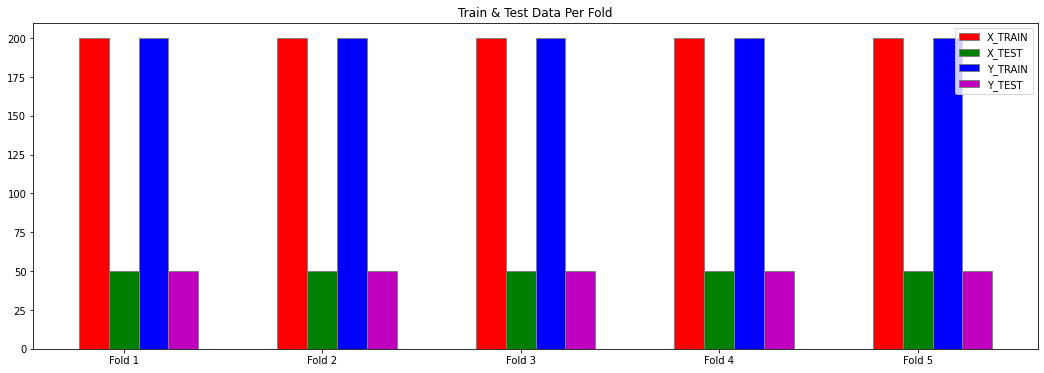

In [1240]:
fig = plt.subplots(figsize=(18,6))
barWidth = 0.15
X_TRAIN = [len(x_train_data[0]), len(x_train_data[1]), len(x_train_data[2]), len(x_train_data[3]), len(x_train_data[4])]
X_TEST = [len(x_test_data[0]), len(x_test_data[1]), len(x_test_data[2]), len(x_test_data[3]), len(x_test_data[4])]
Y_TRAIN = [len(y_train_data[0]), len(y_train_data[1]), len(y_train_data[2]), len(y_train_data[3]), len(y_train_data[4])]                                                                              
Y_TEST = [len(y_test_data[0]), len(y_test_data[1]), len(y_test_data[2]), len(y_test_data[3]), len(y_test_data[4])]                                                                              

br1 = np.arange(len(X_TRAIN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.title("Train & Test Data Per Fold")
plt.bar(br1, X_TRAIN, color ='r', width = barWidth,
        edgecolor ='grey', label ='X_TRAIN')
plt.bar(br2, X_TEST, color ='g', width = barWidth,
        edgecolor ='grey', label ='X_TEST')
plt.bar(br3, Y_TRAIN, color ='b', width = barWidth,
        edgecolor ='grey', label ='Y_TRAIN')
plt.bar(br4, Y_TEST, color ='m', width = barWidth,
        edgecolor ='grey', label ='Y_TEST')

plt.xticks([r + barWidth for r in range(len(X_TRAIN))],
        ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"])
 
plt.legend()
plt.show()

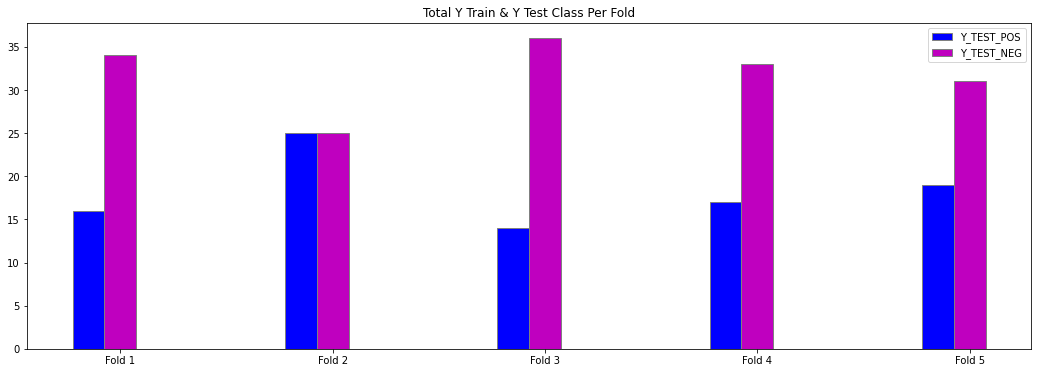

In [1241]:
fig = plt.subplots(figsize=(18,6))
barWidth = 0.15
# Y_TRAIN_POS = [sum(p == 1 for p in y_train_data[0]), sum(p == 1 for p in y_train_data[1]), sum(p == 1 for p in y_train_data[2]), sum(p == 1 for p in y_train_data[3]), sum(p == 1 for p in y_train_data[4])]
# Y_TRAIN_NEG = [sum(p == 0 for p in y_train_data[0]), sum(p == 0 for p in y_train_data[1]), sum(p == 0 for p in y_train_data[2]), sum(p == 0 for p in y_train_data[3]), sum(p == 0 for p in y_train_data[4])]
Y_TEST_POS = [sum(p == 1 for p in y_test_data[0]), sum(p == 1 for p in y_test_data[1]), sum(p == 1 for p in y_test_data[2]), sum(p == 1 for p in y_test_data[3]), sum(p == 1 for p in y_test_data[4])]
Y_TEST_NEG = [sum(p == 0 for p in y_test_data[0]), sum(p == 0 for p in y_test_data[1]), sum(p == 0 for p in y_test_data[2]), sum(p == 0 for p in y_test_data[3]), sum(p == 0 for p in y_test_data[4])]

# br1 = np.arange(len(Y_TRAIN))
# br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]
# br4 = [x + barWidth for x in br3]

br1 = np.arange(len(Y_TEST_POS))
br2 = [x + barWidth for x in br1]

plt.title("Total Y Train & Y Test Class Per Fold")
# plt.bar(br1, Y_TRAIN_POS, color ='r', width = barWidth,
#         edgecolor ='grey', label ='Y_TRAIN_POS')
# plt.bar(br2, Y_TRAIN_NEG, color ='g', width = barWidth,
#         edgecolor ='grey', label ='Y_TRAIN_NEG')
plt.bar(br1, Y_TEST_POS, color ='b', width = barWidth,
        edgecolor ='grey', label ='Y_TEST_POS')
plt.bar(br2, Y_TEST_NEG, color ='m', width = barWidth,
        edgecolor ='grey', label ='Y_TEST_NEG')

plt.xticks([r + barWidth for r in range(len(Y_TRAIN))],
        ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"])
 
plt.legend()
plt.show()

In [1242]:
c_data = 15
max_iteration = 1000
tolerance = 0.01

Accuration:  80.0 %
Precission:  0.8
Recall:  0.5
F1 Score:  0.6153846153846154


Text(69.0, 0.5, 'Truth')

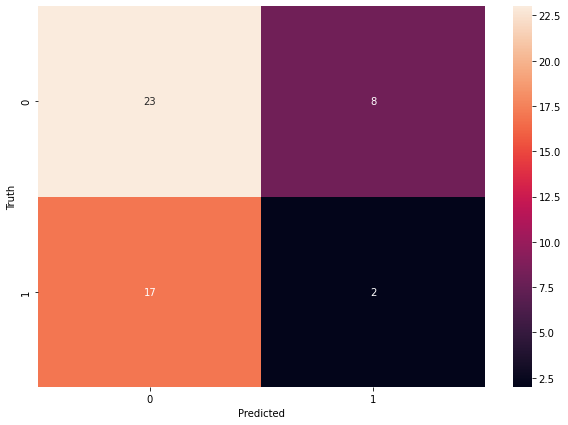

In [1243]:
np.random.seed(100)

model_1 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

model_1 = model_1.fit(x_train_data[0], y_train_data[0])

prediction_1 = model_1.predict(x_test_data[0])
false_1 = (prediction_1 != y_test_data[0]).sum()
true_1 = (prediction_1 == y_test_data[0]).sum()
tn_1, fp_1, fn_1, tp_1 = confusion_matrix(y_test_data[0], prediction_1).ravel()
precision_score_1 = tp_1 / (tp_1 + fp_1)
recall_score_1 = tp_1 / (tp_1 + fn_1)
f1_score_1 = 2 * (recall_score_1 * precision_score_1) / (recall_score_1 + precision_score_1)
print("Accuration: ", true_1 / (true_1 + false_1) * 100, '%')
print("Precission: ", precision_score_1)
print("Recall: ", recall_score_1)
print("F1 Score: ", f1_score_1)
print("======================")

cm_1 = confusion_matrix(y_test, prediction_1)
plt.figure(figsize=(10,7))
sn.heatmap(cm_1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  68.0 %
Precission:  0.7368421052631579
Recall:  0.56
F1 Score:  0.6363636363636364


Text(69.0, 0.5, 'Truth')

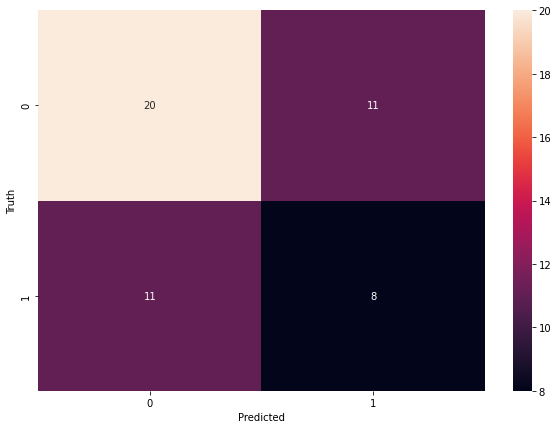

In [1244]:
np.random.seed(100)

model_2 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

model_2 = model_2.fit(x_train_data[1], y_train_data[1])

prediction_2 = model_2.predict(x_test_data[1])
false_2 = (prediction_2 != y_test_data[1]).sum()
true_2 = (prediction_2 == y_test_data[1]).sum()
tn_2, fp_2, fn_2, tp_2 = confusion_matrix(y_test_data[1], prediction_2).ravel()
precision_score_2 = tp_2 / (tp_2 + fp_2)
recall_score_2 = tp_2 / (tp_2 + fn_2)
f1_score_2 = 2 * (recall_score_2 * precision_score_2) / (recall_score_2 + precision_score_2)
print("Accuration: ", true_2 / (true_2 + false_2) * 100, '%')
print("Precission: ", precision_score_2)
print("Recall: ", recall_score_2)
print("F1 Score: ", f1_score_2)
print("======================")

cm_2 = confusion_matrix(y_test, prediction_2)
plt.figure(figsize=(10,7))
sn.heatmap(cm_2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  90.0 %
Precission:  0.8461538461538461
Recall:  0.7857142857142857
F1 Score:  0.8148148148148148


Text(69.0, 0.5, 'Truth')

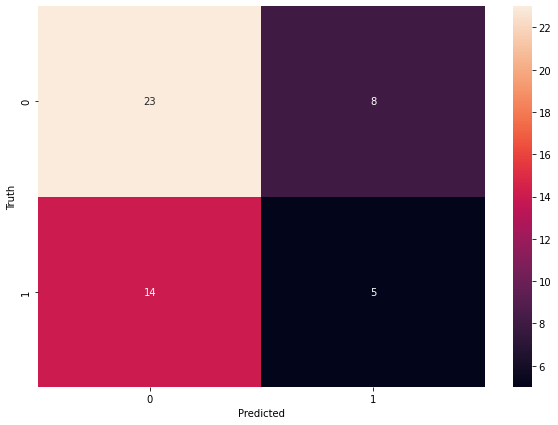

In [1245]:
np.random.seed(100)

model_3 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

model_3 = model_3.fit(x_train_data[2], y_train_data[2])

prediction_3 = model_3.predict(x_test_data[2])
false_3 = (prediction_3 != y_test_data[2]).sum()
true_3 = (prediction_3 == y_test_data[2]).sum()
tn_3, fp_3, fn_3, tp_3 = confusion_matrix(y_test_data[2], prediction_3).ravel()
precision_score_3 = tp_3 / (tp_3 + fp_3)
recall_score_3 = tp_3 / (tp_3 + fn_3)
f1_score_3 = 2 * (recall_score_3 * precision_score_3) / (recall_score_3 + precision_score_3)
print("Accuration: ", true_3 / (true_3 + false_3) * 100, '%')
print("Precission: ", precision_score_3)
print("Recall: ", recall_score_3)
print("F1 Score: ", f1_score_3)
print("======================")

cm_3 = confusion_matrix(y_test, prediction_3)
plt.figure(figsize=(10,7))
sn.heatmap(cm_3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  74.0 %
Precission:  0.625
Recall:  0.5882352941176471
F1 Score:  0.6060606060606061


Text(69.0, 0.5, 'Truth')

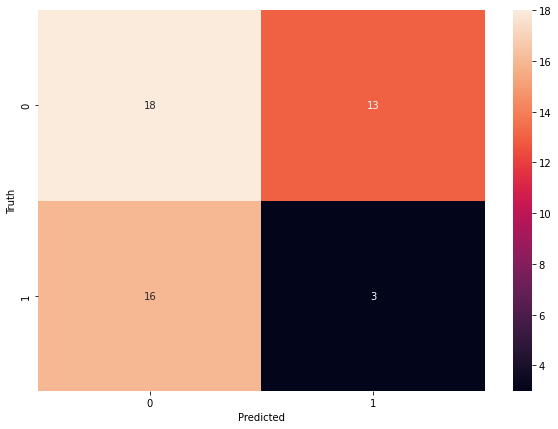

In [1246]:
np.random.seed(100)

model_4 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

model_4 = model_4.fit(x_train_data[3], y_train_data[3])

prediction_4 = model_4.predict(x_test_data[3])
false_4 = (prediction_4 != y_test_data[3]).sum()
true_4 = (prediction_4 == y_test_data[3]).sum()
tn_4, fp_4, fn_4, tp_4 = confusion_matrix(y_test_data[3], prediction_4).ravel()
precision_score_4 = tp_4 / (tp_4 + fp_4)
recall_score_4 = tp_4 / (tp_4 + fn_4)
f1_score_4 = 2 * (recall_score_4 * precision_score_4) / (recall_score_4 + precision_score_4)
print("Accuration: ", true_4 / (true_4 + false_4) * 100, '%')
print("Precission: ", precision_score_4)
print("Recall: ", recall_score_4)
print("F1 Score: ", f1_score_4)
print("======================")

cm_4 = confusion_matrix(y_test, prediction_4)
plt.figure(figsize=(10,7))
sn.heatmap(cm_4, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  68.0 %
Precission:  0.6153846153846154
Recall:  0.42105263157894735
F1 Score:  0.5


Text(69.0, 0.5, 'Truth')

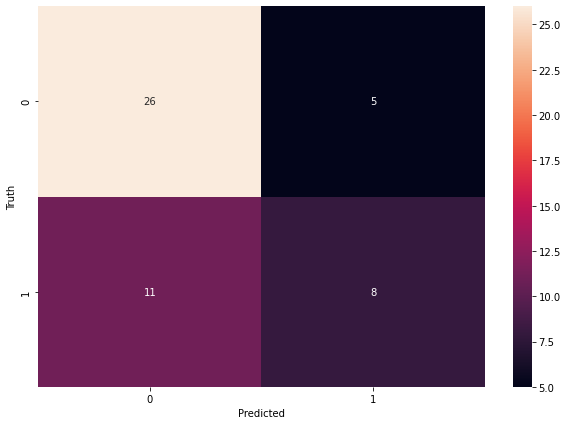

In [1247]:
np.random.seed(100)

model_5 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

model_5 = model_5.fit(x_train_data[4], y_train_data[4])

prediction_5 = model_5.predict(x_test_data[4])
false_5 = (prediction_5 != y_test_data[4]).sum()
true_5 = (prediction_5 == y_test_data[4]).sum()
tn_5, fp_5, fn_5, tp_5 = confusion_matrix(y_test_data[4], prediction_5).ravel()
precision_score_5 = tp_5 / (tp_5 + fp_5)
recall_score_5 = tp_5 / (tp_5 + fn_5)
f1_score_5 = 2 * (recall_score_5 * precision_score_5) / (recall_score_5 + precision_score_5)
print("Accuration: ", true_5 / (true_5 + false_5) * 100, '%')
print("Precission: ", precision_score_5)
print("Recall: ", recall_score_5)
print("F1 Score: ", f1_score_5)
print("======================")

cm_5 = confusion_matrix(y_test, prediction_5)
plt.figure(figsize=(10,7))
sn.heatmap(cm_5, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

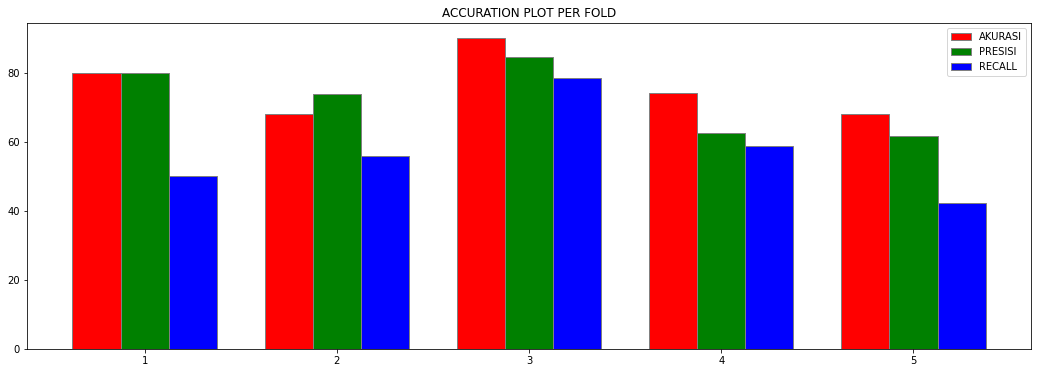

In [1255]:
fig = plt.subplots(figsize=(18,6))
barWidth = 0.25
ACCURACY = [(true_1 / (true_1 + false_1) * 100), (true_2 / (true_2 + false_2) * 100), (true_3 / (true_3 + false_3) * 100), (true_4 / (true_4 + false_4) * 100), (true_5 / (true_5 + false_5) * 100)]
PRECISION = [precision_score_1 * 100, precision_score_2 * 100, precision_score_3 * 100, precision_score_4 * 100, precision_score_5 * 100]
RECALL = [recall_score_1 * 100, recall_score_2 * 100, recall_score_3 * 100, recall_score_4 * 100, recall_score_5 * 100]
 
br1 = np.arange(len(ACCURACY))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.title("ACCURATION PLOT PER FOLD")
plt.bar(br1, ACCURACY, color ='r', width = barWidth,
        edgecolor ='grey', label ='AKURASI')
plt.bar(br2, PRECISION, color ='g', width = barWidth,
        edgecolor ='grey', label ='PRESISI')
plt.bar(br3, RECALL, color ='b', width = barWidth,
        edgecolor ='grey', label ='RECALL')

plt.xticks([r + barWidth for r in range(len(ACCURACY))],
    ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"])
 
plt.legend()
plt.show()

In [1249]:
avg = (true_1 / (true_1 + false_1) * 100) + (true_2 / (true_2 + false_2) * 100) + (true_3 / (true_3 + false_3) * 100) + (true_4 / (true_4 + false_4) * 100) + (true_5 / (true_5 + false_5) * 100)
avg = avg/5
avg

76.0

In [1250]:
# np.random.seed(100)

# model = SVC(
#     C = 15,
#     decision_function_shape = 'ovr',
#     gamma = 1.0,
#     kernel = 'linear',
#     max_iter = 125,
#     random_state = 0,
#     tol = 0.01,
#     )

# model = model.fit(x_train, y_train)

In [1251]:
# prediction = model.predict(x_test)
# false = (prediction != y_test).sum()
# true = (prediction == y_test).sum()
# tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
# precision_score = tp / (tp + fp)
# recall_score = tp / (tp + fn)
# f1_score = 2 * (recall_score * precision_score) / (recall_score + precision_score)
# print("Accuration: ", true / (true + false) * 100, '%')
# print("Precission: ", precision_score)
# print("Recall: ", recall_score)
# print("F1 Score: ", f1_score)

In [1252]:
# import matplotlib.pyplot as plt
# import seaborn as sn
# %matplotlib inline

# cm = confusion_matrix(y_test, prediction)

# plt.figure(figsize=(10,7))
# sn.heatmap(cm, annot=True)
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

In [1253]:
# from sklearn.metrics import RocCurveDisplay
# svc_disp = RocCurveDisplay.from_estimator(model, x_test, y_test)

In [1254]:
# from sklearn.metrics import PrecisionRecallDisplay

# y_score = model.decision_function(x_test)

# display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="LinearSVC")
# display.ax_.set_title("2-class Precision-Recall curve")